# 第８章 サポートベクトルマシン

## 8.1 最適な境界

## 8.2 最適化の理論

## 8.3 サポートベクトルマシンの解

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib
import scipy
from scipy import stats
from numpy.random import randn #正規乱数

In [87]:
import cvxopt
from cvxopt import matrix

In [88]:
a=randn(1);b=randn(1)
n=100
X=randn(n,2)
y=np.sign(a*X[:,0]+b*X[:,1]+0.1*randn(n))
y=y.reshape(-1,1)  #形を明示してわたす必要がある

In [188]:
def svm_1(X,y,C):
    eps=0.0001
    n=X.shape[0]
    P=np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            P[i,j]=np.dot(X[i,:],X[j,:])*y[i]*y[j]
    #パッケージにあるmatrix関数を使って指定する必要がある
    P=matrix(P+np.eye(n)*eps)                
    A=matrix(-y.T.astype(np.float))
    b=matrix(np.array([0]).astype(np.float))
    h=matrix(np.array([C]*n+[0]*n).reshape(-1,1).astype(np.float))
    G=matrix(np.concatenate([np.diag(np.ones(n)),np.diag(-np.ones(n))]))       
    q=matrix(np.array([-1]*n).astype(np.float))
    res=cvxopt.solvers.qp(P,q,A=A, b=b,G=G, h=h)    # ソルバーの実行
    alpha=np.array(res['x'])  #xが本文中のalphaに対応
    beta=((alpha*y).T@X).reshape(2,1)
    index=np.arange(0,n,1)
    index_1=index[eps<alpha[:,0]]
    index_2=index[(alpha<C-eps)[:,0]]
    index=np.concatenate((index_1,index_2))
    beta_0=np.mean(y[index]-X[index,:]@beta)
    return {'beta':beta, 'beta_0':beta_0}

In [189]:
n=10
matrix(np.concatenate([np.diag(np.ones(2)),np.diag(-np.ones(2))]))

<4x2 matrix, tc='d'>

     pcost       dcost       gap    pres   dres
 0: -1.5093e+02 -8.4472e+03  2e+04  9e-01  1e-14
 1:  1.7287e+00 -3.0570e+03  5e+03  1e-01  1e-14
 2:  2.9845e+01 -5.0382e+02  7e+02  1e-02  4e-14
 3: -4.4683e+01 -1.8192e+02  1e+02  2e-03  1e-14
 4: -7.5948e+01 -1.1792e+02  4e+01  5e-04  7e-15
 5: -8.2205e+01 -1.1564e+02  3e+01  3e-04  5e-15
 6: -9.1955e+01 -1.0403e+02  1e+01  4e-15  7e-15
 7: -9.5460e+01 -9.8454e+01  3e+00  9e-15  8e-15
 8: -9.6475e+01 -9.6813e+01  3e-01  8e-16  7e-15
 9: -9.6613e+01 -9.6650e+01  4e-02  5e-15  7e-15
10: -9.6630e+01 -9.6631e+01  6e-04  3e-15  6e-15
11: -9.6631e+01 -9.6631e+01  6e-06  6e-15  9e-15
Optimal solution found.


{'beta': array([[-6.70453435],
        [ 1.01730372]]), 'beta_0': -0.05047786195001627}

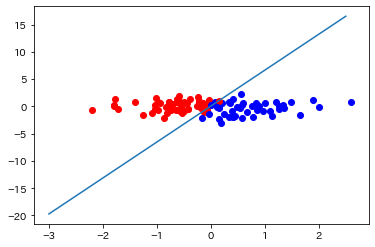

In [190]:
a=randn(1);b=randn(1)
n=100
X=randn(n,2)
y=np.sign(a*X[:,0]+b*X[:,1]+0.1*randn(n))
y=y.reshape(-1,1)  #形を明示してわたす必要がある
for i in range(n):
    if y[i]==1:
        plt.scatter(X[i,0],X[i,1],c="red")
    else :
        plt.scatter(X[i,0],X[i,1],c="blue")
res=svm_1(X,y,C=10)
def f(x):
    return -res['beta_0']/res['beta'][1]-x*res['beta'][0]/res['beta'][1]
x_seq=np.arange(-3,3,0.5)
plt.plot(x_seq,f(x_seq))
res

## 8.4 カーネルを用いたサポートベクトルマシンの拡張

In [179]:
def K_linear(x,y):
    return x.T@y
def K_poly(x,y):
    return (1+x.T@y)**2

In [191]:
def svm_2(X,y,C,K):
    eps=0.0001
    n=X.shape[0]
    P=np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            P[i,j]=K(X[i,:],X[j,:])*y[i]*y[j]
    #パッケージにあるmatrix関数を使って指定する必要がある
    P=matrix(P+np.eye(n)*eps)                
    A=matrix(-y.T.astype(np.float))
    b=matrix(np.array([0]).astype(np.float))
    h=matrix(np.array([C]*n+[0]*n).reshape(-1,1).astype(np.float))
    G=matrix(np.concatenate([np.diag(np.ones(n)),np.diag(-np.ones(n))]))       
    q=matrix(np.array([-1]*n).astype(np.float))
    res=cvxopt.solvers.qp(P,q, A=A, b=b,G=G, h=h)
    alpha=np.array(res['x'])  #xが本文中のalphaに対応
    beta=((alpha*y).T@X).reshape(2,1)
    index=np.arange(0,n,1)
    index_1=index[eps<alpha[:,0]]
    index_2=index[(alpha<C-eps)[:,0]]
    index=np.concatenate((index_1,index_2))
    beta_0=np.mean(y[index]-X[index,:]@beta)
    return {'alpha':alpha, 'beta':beta, 'beta_0':beta_0}

In [192]:
# 実行
a=3;b=-1
n=200
X=randn(n,2)
y=np.sign(a*X[:,0]+b*X[:,1]**2+0.3*randn(n))
y=y.reshape(-1,1)

In [193]:
def plot_kernel(K,line): #引数lineで線の種類を指定する
    res=svm_2(X,y,1,K)
    alpha=res['alpha'][:,0]
    beta_0=res['beta_0']
    def f(u,v):
        S=beta_0
        for i in range(X.shape[0]):
            S=S+alpha[i]*y[i]*K(X[i,:],[u,v])
        return S[0]
    uu=np.arange(-2,2,0.1); vv=np.arange(-2,2,0.1); ww=[]
    for v in vv:
        w=[]
        for u in uu:
            w.append(f(u,v))
        ww.append(w)
    plt.contour(uu,vv,ww,levels=0,linestyles=line)

     pcost       dcost       gap    pres   dres
 0: -8.3968e+01 -6.3776e+02  4e+03  4e+00  4e-14
 1: -5.0930e+01 -4.6969e+02  1e+03  8e-01  2e-14
 2: -3.1203e+01 -2.1739e+02  3e+02  2e-01  2e-14
 3: -2.2226e+01 -5.5547e+01  5e+01  2e-02  4e-15
 4: -2.5785e+01 -3.5723e+01  1e+01  6e-03  6e-15
 5: -2.7313e+01 -3.1699e+01  5e+00  2e-03  4e-15
 6: -2.8161e+01 -2.9341e+01  1e+00  3e-04  4e-15
 7: -2.8476e+01 -2.8833e+01  4e-01  7e-05  4e-15
 8: -2.8583e+01 -2.8693e+01  1e-01  1e-05  4e-15
 9: -2.8630e+01 -2.8634e+01  4e-03  3e-07  4e-15
10: -2.8632e+01 -2.8632e+01  5e-05  4e-09  4e-15
11: -2.8632e+01 -2.8632e+01  5e-07  4e-11  4e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -9.6038e+01 -5.6985e+02  3e+03  3e+00  4e-15
 1: -6.0259e+01 -3.9784e+02  7e+02  5e-01  4e-15
 2: -4.1334e+01 -1.2678e+02  1e+02  4e-02  1e-14
 3: -4.8591e+01 -6.5060e+01  2e+01  7e-03  4e-15
 4: -5.2551e+01 -5.9275e+01  7e+00  2e-03  2e-15
 5: -5.4256e+01 -5.7174e+01  3e+00  8e-04  2e-1

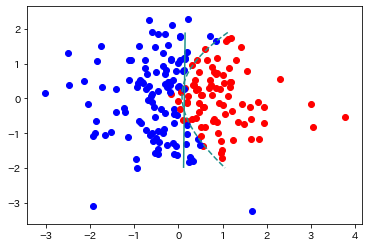

In [194]:
for i in range(n):
    if y[i]==1:
        plt.scatter(X[i,0],X[i,1],c="red")
    else:
        plt.scatter(X[i,0],X[i,1],c="blue")
plot_kernel(K_poly,line="dashed")
plot_kernel(K_linear,line="solid")

In [96]:
import sklearn
from sklearn import svm

In [97]:
x=randn(200,2)
x[0:100,]=x[0:100,]+2
x[100:150,]=x[100:150,]-2
y=np.concatenate(([1 for i in range(150)],[2 for i in range(50)]))

In [98]:
train=np.random.choice(200, 100, replace=False)
test=list(set(range(200))-set(train))
res_svm = svm.SVC(kernel="rbf",gamma=1,C=100)  #チューニングなしのSVM

In [99]:
res_svm.fit(x[train,],y[train])  #実行

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [100]:
res_svm.predict(x[test,])      #テストデータの予測結果

array([2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1,
       1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2])

In [101]:
import mlxtend
from mlxtend.plotting import plot_decision_regions

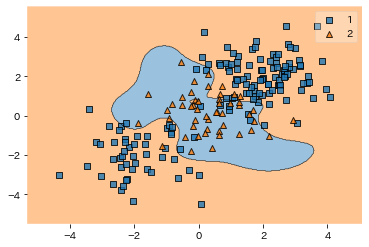

In [102]:
plot_decision_regions(x,y,clf=res_svm)

In [103]:
from sklearn.model_selection import GridSearchCV

In [104]:
grid = {'C': [0.1, 1,10, 100, 1000],  'gamma' : [0.5, 1, 2, 3, 4]}

In [105]:
tune = GridSearchCV(svm.SVC(), grid, cv=10)
tune.fit(x[train,],y[train])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.5, 1, 2, 3, 4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [106]:
tune.best_params_   #C=1, gamma=0.5が最適だとわかる

{'C': 1, 'gamma': 0.5}

In [122]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.target_names
x=iris.data
y=iris.target
train=np.random.choice(150, 120, replace=False)
test=np.ones(150,dtype=bool)
test[train]=False

In [127]:
iris_svm = svm.SVC(kernel="rbf",gamma=1,C=10)
iris_svm.fit(x[train,],y[train])

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [125]:
# 2章で定義した関数table_count (再掲)
def table_count(m,u,v):
    n=u.shape[0]
    count=np.zeros([m,m])
    for i in range(n):
        count[int(u[i]),int(v[i])]+=1
    return(count)

In [126]:
y_pre=iris_svm.predict(x[test,])
table_count(3,y[test],y_pre)

array([[ 9.,  0.,  0.],
       [ 0., 10.,  0.],
       [ 0.,  3.,  8.]])